필요한 모듈 설치

In [ ]:
pip install pymupdf pillow -q

설치한 모듈 불러오기

In [3]:
from PIL import Image, ImageDraw
import fitz

PDF loade 및 page count

In [4]:
document = fitz.open("./data/1706.03762v7.pdf")
document.page_count

15

Page 출력

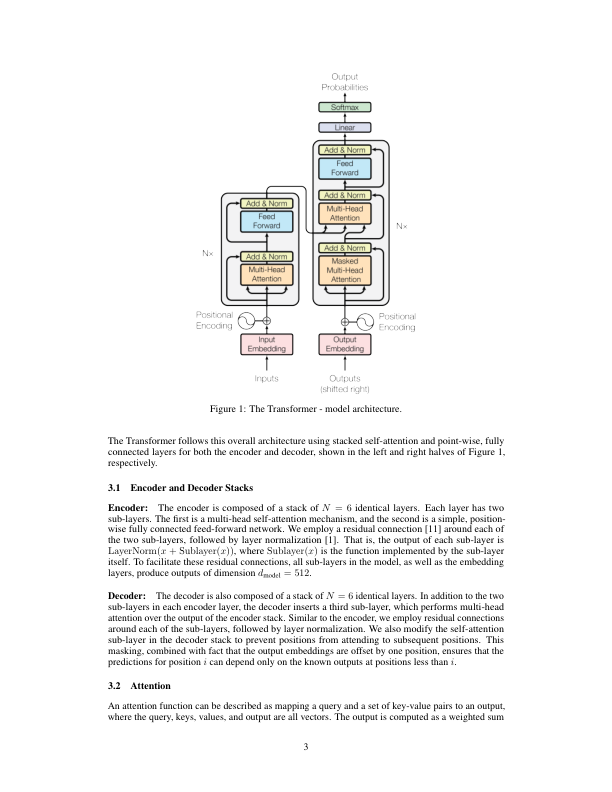

In [5]:
pix = document[2].get_pixmap()
Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

Page 내 요소 Bounding Box 처리

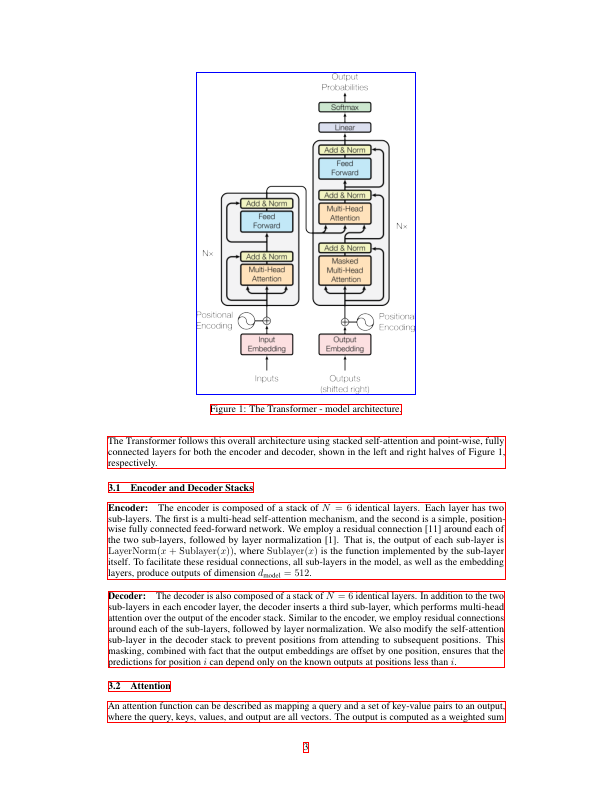

In [6]:
page = document[2]  # page 불러오기기
pix = page.get_pixmap()

image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
draw = ImageDraw.Draw(image)

# Image Bounding Box
image_list = page.get_images(full=True)
for image_info in image_list:
    xref = image_info[0] # 이미지 XREF 번호
    bbox = tuple(page.get_image_bbox(image_info)) # 이미지 바운딩 박스 좌표 (l, t, r, b)
    draw.rectangle(bbox, outline="blue", width=1)

# Text Bounding Box
blocks = page.get_text("blocks")
for block in blocks:
    x0, y0, x1, y1, content, block_no, block_type = block[:7]
    bbox = (x0, y0, x1, y1)  # (l, t, r, b)
    if block_type == 0:
        draw.rectangle(bbox, outline="red")


image

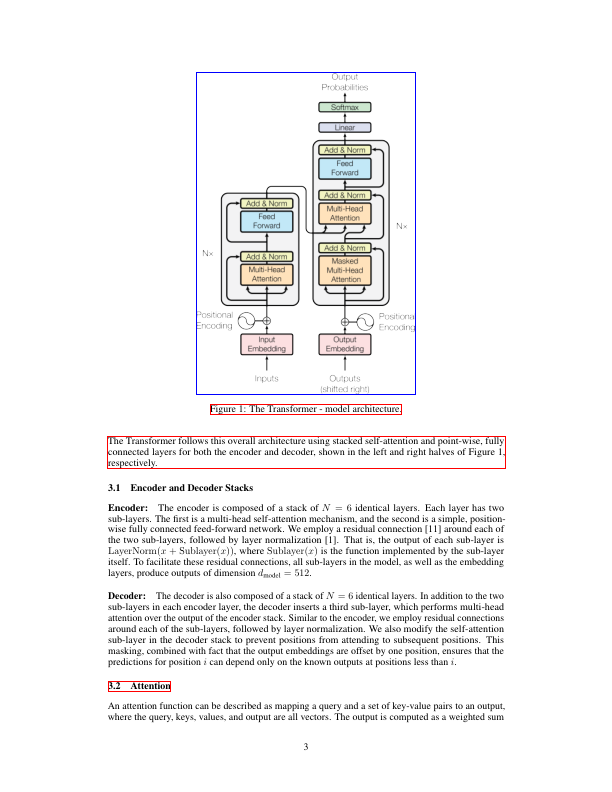

In [ ]:
page = document[2]  # page 불러오기기
pix = page.get_pixmap()

image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
draw = ImageDraw.Draw(image)

image_list = page.get_images(full=True)
image_bboxes = []
for image_info in image_list:
    bbox = tuple(page.get_image_bbox(image_info))  # 이미지 바운딩 박스 좌표 (l, t, r, b)
    image_bboxes.append(bbox)
    draw.rectangle(bbox, outline="blue", width=1)

# 텍스트 바운딩 박스와 이미지 근처 체크 함수
def is_near(bbox1, bbox2, threshold=10):
    """두 바운딩 박스가 threshold 거리 이내에 있는지 확인"""
    l1, t1, r1, b1 = bbox1
    l2, t2, r2, b2 = bbox2

    if not (r1 < l2 or r2 < l1 or b1 < t2 or b2 < t1):
        return True

    if abs(r1 - l2) <= threshold or abs(r2 - l1) <= threshold:
        return True
    if abs(b1 - t2) <= threshold or abs(b2 - t1) <= threshold:
        return True

    return False

blocks = page.get_text("blocks")
for block in blocks:
    x0, y0, x1, y1, content, block_no, block_type = block[:7]
    bbox = (x0, y0, x1, y1)  # (l, t, r, b)

    for image_bbox in image_bboxes:
        if is_near(bbox, image_bbox, threshold=50):
            draw.rectangle(bbox, outline="red")
            break

image


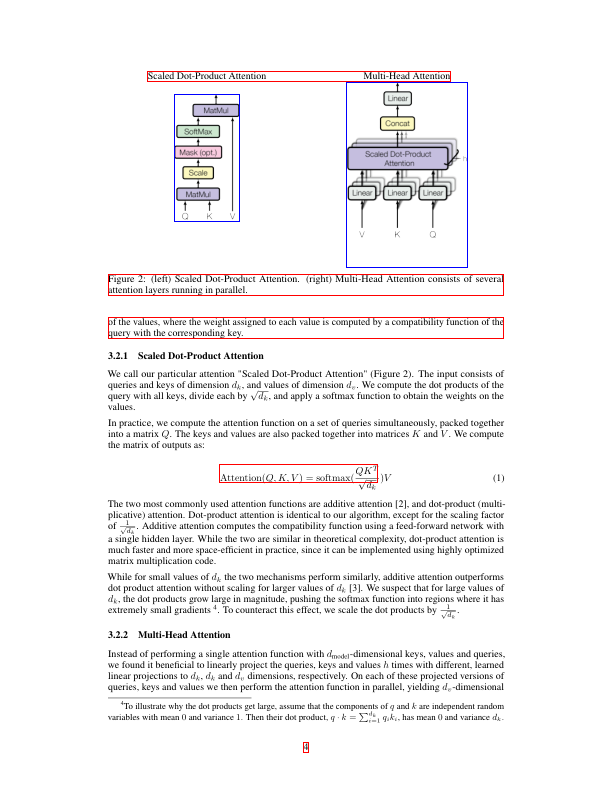

이미지 주변 텍스트:
Scaled Dot-Product Attention
Multi-Head Attention
Figure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several
attention layers running in parallel.
of the values, where the weight assigned to each value is computed by a compatibility function of the
query with the corresponding key.
Attention(Q, K, V ) = softmax(QKT
4


In [18]:
page = document[3]  # page 불러오기
pix = page.get_pixmap()

image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
draw = ImageDraw.Draw(image)

# 이미지 바운딩 박스 리스트 생성
image_list = page.get_images(full=True)
image_bboxes = []
for image_info in image_list:
    bbox = tuple(page.get_image_bbox(image_info))  # 이미지 바운딩 박스 좌표 (l, t, r, b)
    image_bboxes.append(bbox)
    draw.rectangle(bbox, outline="blue", width=1)

# 텍스트 바운딩 박스와 이미지 근처 체크 함수
def is_near(bbox1, bbox2, threshold=10):
    """두 바운딩 박스가 threshold 거리 이내에 있는지 확인"""
    l1, t1, r1, b1 = bbox1
    l2, t2, r2, b2 = bbox2

    # 바운딩 박스가 겹치는 경우
    if not (r1 < l2 or r2 < l1 or b1 < t2 or b2 < t1):
        return True

    # threshold 거리 이내에 있는 경우 (수평 또는 수직으로 가까운 경우)
    if abs(r1 - l2) <= threshold or abs(r2 - l1) <= threshold:
        return True
    if abs(b1 - t2) <= threshold or abs(b2 - t1) <= threshold:
        return True

    return False

# 이미지 근처 텍스트를 저장할 리스트
near_texts = []

# 텍스트 바운딩 박스 처리
blocks = page.get_text("blocks")
for block in blocks:
    x0, y0, x1, y1, content, block_no, block_type = block[:7]
    bbox = (x0, y0, x1, y1)  # (l, t, r, b)

    # 이미지 근처에 있는 텍스트 바운딩 박스만 처리
    if block_type == 0:  # 텍스트 블록일 경우만 처리
        for image_bbox in image_bboxes:
            if is_near(bbox, image_bbox, threshold=50):
                draw.rectangle(bbox, outline="red")
                near_texts.append(content.strip())
                break

display(image)
print("이미지 주변 텍스트:")
for text in near_texts:
    print(text)
